In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.iolib.summary2 import summary_col
from scipy.special import jv
from scipy.stats import pearsonr
import numba
from pandas.plotting import table
import matplotlib.gridspec as gridspec

In [ ]:
TESIS Sánchez López Eduardo Iván 

In [2]:
read_file = pd.read_excel (r'C:\Users\Eduardo Sanchez\anaconda3\costco.xlsx')
read_file.to_csv (r'C:\Users\Eduardo Sanchez\anaconda3\costco.csv', index = None, header=True)

In [64]:
#funcion que convierte un string en un objeto de tiempo, cada string pasa por la funcion
d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')
df = pd.read_csv('anaconda3/costco.csv',parse_dates=['Date'], date_parser=d_parser)
df.head()

C:\Users\Eduardo Sanchez\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,Date,Adj Close,HPR
0,2015-12-21,141.747284,NaN
1,2015-12-22,143.383606,0.011544
2,2015-12-23,143.810501,0.002977
3,2015-12-24,143.846100,0.000248
4,2015-12-28,143.321320,-0.003648


In [11]:
#df1 = pd.read_excel(r'C:\Users\Eduardo Sanchez\anaconda3\Data1 (1).xlsx', sheet_name="Cost")

In [18]:
#df['Date'] = pd.to_datetime(df['Date'], format ='%Y/%m/%d')
#df.loc[0, 'Date'].day_name()
#df['Date']

0      2015-12-21
1      2015-12-22
2      2015-12-23
3      2015-12-24
4      2015-12-28
          ...    
1258   2020-12-18
1259   2020-12-21
1260   2020-12-22
1261   2020-12-23
1262   2020-12-24
Name: Date, Length: 1263, dtype: datetime64[ns]

In [ ]:
#df.plot.line(y="Adj Close", use_index=True, title="Costco Comportamiento",ylabel= "Dólares",xlim=(2,1264))

In [22]:
df['Date'].dt.day_name()

0          Monday
1         Tuesday
2       Wednesday
3        Thursday
4          Monday
          ...    
1258       Friday
1259       Monday
1260      Tuesday
1261    Wednesday
1262     Thursday
Name: Date, Length: 1263, dtype: object

In [24]:
filt = (df['Date'] >= '2020')
#Mandamos a imprimir el objeto como tal,va a mandar un booleano,dira si el objeto posicionado es mayor o menor que el 2020
filt

In [28]:
#ahora con orta notacion
filt2 = (df['Date']>= '2019') & (df['Date']<'2020')
filt2
#df.iloc[filt]


0       False
1       False
2       False
3       False
4       False
        ...  
1258    False
1259    False
1260    False
1261    False
1262    False
Name: Date, Length: 1263, dtype: bool

In [33]:
filt3= (df['Date']>= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-02-02'))
filt3

0       False
1       False
2       False
3       False
4       False
        ...  
1258    False
1259    False
1260    False
1261    False
1262    False
Name: Date, Length: 1263, dtype: bool

In [34]:
#separando por medio de etiquetas, inplace=true que el cambio es permanente es para ver si se crea un nuevo dataframe o no
df.set_index('Date', inplace=True)

In [35]:
#se crea un esamblaje creado justo para una medida de tiempo que queramos
semanaPar = df['Adj Close'].resample('2w').max()

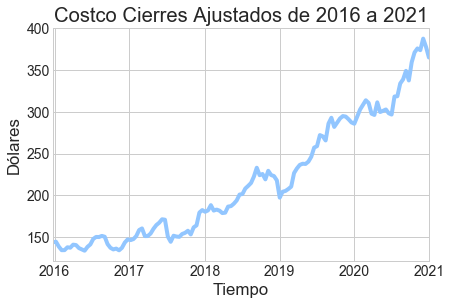

In [43]:
graficoCos = semanaPar.plot(title='Costco Cierres Ajustados de 2016 a 2021',ylabel='Dólares',xlabel='Tiempo')
graficoCos.figure.savefig('graficoCos.png')

In [9]:
read_file = pd.read_excel (r'C:\Users\Eduardo Sanchez\anaconda3\wal.xlsx')
read_file.to_csv (r'C:\Users\Eduardo Sanchez\anaconda3\wal.csv', index = None, header=True)

In [8]:
d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')
df1 = pd.read_csv('anaconda3/wal.csv',parse_dates=['Date'], date_parser=d_parser)
df1.head()

C:\Users\Eduardo Sanchez\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Date,Adj Close,Unnamed: 2
0,2015-12-21,52.845825,NaN
1,2015-12-22,53.724369,0.000024
2,2015-12-23,54.212456,0.000024
3,2015-12-24,53.981728,0.000024
4,2015-12-28,53.910725,0.000094


In [9]:
df1.set_index('Date', inplace=True)

In [10]:
semanaPar1 = df1['Adj Close'].resample('2w').max()

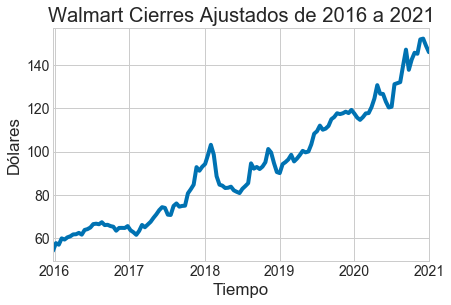

In [85]:
graficoWal = semanaPar.plot(title='Walmart Cierres Ajustados de 2016 a 2021',ylabel='Dólares',xlabel='Tiempo')
graficoWal.figure.savefig('graficoWalm.png')

In [11]:
read_file = pd.read_excel (r'C:\Users\Eduardo Sanchez\anaconda3\tgt.xlsx')
read_file.to_csv (r'C:\Users\Eduardo Sanchez\anaconda3\tgt.csv', index = None, header=True)

In [3]:
d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')
df2 = pd.read_csv('anaconda3/tgt.csv',parse_dates=['Date'], date_parser=d_parser)
df2.head()

C:\Users\Eduardo Sanchez\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Date,Adj Close,Unnamed: 2
0,2015-12-21,61.229752,NaN
1,2015-12-22,61.998219,0.012551
2,2015-12-23,62.886211,0.014323
3,2015-12-24,62.476376,-0.006517
4,2015-12-28,62.220219,-0.004100


In [4]:
df2.set_index('Date', inplace=True)

In [5]:
semanaPar2 = df2['Adj Close'].resample('2w').max()

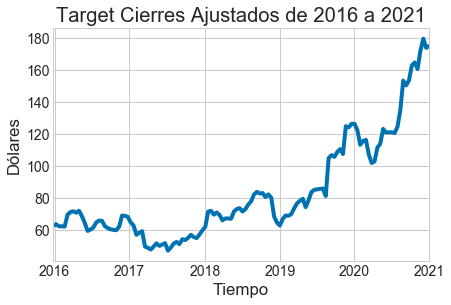

In [93]:
graficoTgt = semanaPar2.plot(title='Target Cierres Ajustados de 2016 a 2021',ylabel='Dólares',xlabel='Tiempo')
graficoTgt.figure.savefig('graficoTgt.png')

In [69]:
graficoWal.plot(label='Wal', legend=True)
graficoCos.plot(label='Cos', legend=True, secondary_y=True)
graficoTgt.plot(label='Tgt', legend=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

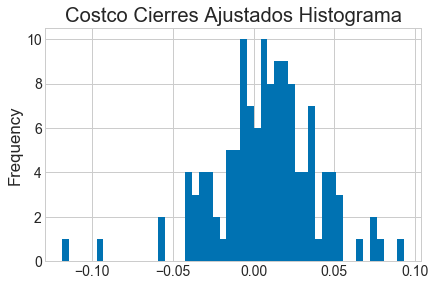

In [78]:
plt.style.use("seaborn-colorblind")
semanaPar.dropna()
histCos = semanaPar.pct_change().plot.hist(bins=50,title='Costco Cierres Ajustados Histograma')
histCos.figure.savefig('histCos1.png')

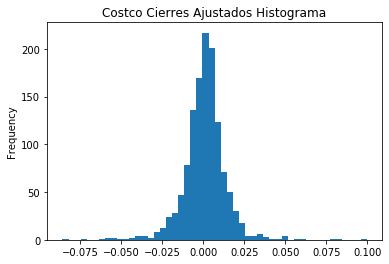

In [8]:
df12 = pd.read_csv('anaconda3/costco.csv')
df12.dropna()
histCos1p2 = df12['Adj Close'].pct_change().plot.hist(bins=50,title='Costco Cierres Ajustados Histograma')
histCos1p2.figure.savefig('histCos12.png')

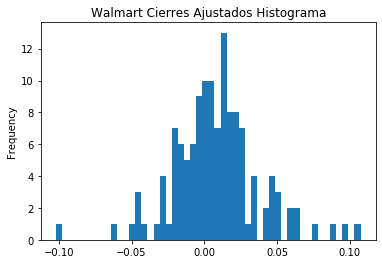

In [11]:
semanaPar1.dropna()
histWal = semanaPar1.pct_change().plot.hist(bins=50,title='Walmart Cierres Ajustados Histograma')
histWal.figure.savefig('histWal.png')

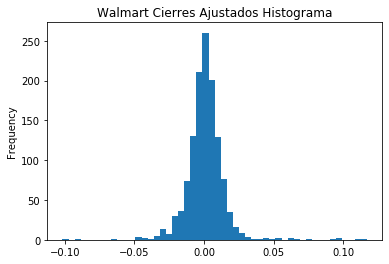

In [14]:
df22 = pd.read_csv('anaconda3/wal.csv')
df22.dropna()
histWal22 = df22['Adj Close'].pct_change().plot.hist(bins=50,title='Walmart Cierres Ajustados Histograma')
histWal22.figure.savefig('histWal221.png')

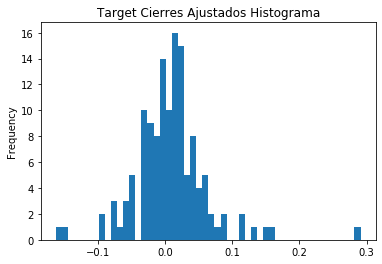

In [6]:
semanaPar2.dropna()
histTgt = semanaPar2.pct_change().plot.hist(bins=50,title='Target Cierres Ajustados Histograma')
histTgt.figure.savefig('histTgt.png')

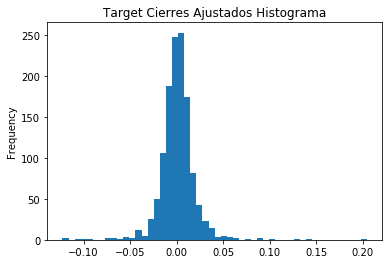

In [15]:
df32 = pd.read_csv('anaconda3/tgt.csv')
df32.dropna()
histTgt32 = df32['Adj Close'].pct_change().plot.hist(bins=50,title='Target Cierres Ajustados Histograma')
histTgt32.figure.savefig('histTgt32.png')

                   CambioP  5diasFutYCambioP
CambioP           1.000000          0.053592
5diasFutYCambioP  0.053592          1.000000


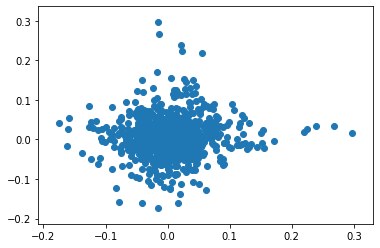

In [8]:
df2['5diasFuturosMenos'] = df2['Adj Close'].shift(-5)
df2['5diasFutYCambioP'] = df2['5diasFuturosMenos'].pct_change(5)
df2['CambioP'] = df2['Adj Close'].pct_change(5)
corr = df2[['CambioP','5diasFutYCambioP']].corr()
print(corr)
plt.scatter(df2['CambioP'],df2['5diasFutYCambioP'])
plt.show()

                  CambioPor  5diasFutYCambioP
CambioPor          1.000000         -0.048824
5diasFutYCambioP  -0.048824          1.000000


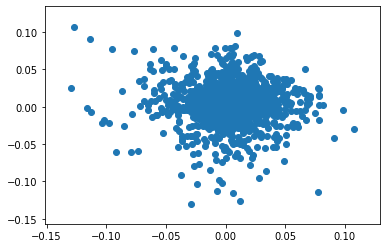

In [16]:
df['5diasFuturosMenos'] = df['Adj Close'].shift(-5)
df['5diasFutYCambioP'] = df['5diasFuturosMenos'].pct_change(5)
df['CambioPor'] = df['Adj Close'].pct_change(5)
corr1 = df[['CambioPor', '5diasFutYCambioP']].corr()
print(corr1)
plt.scatter(df['CambioPor'],df['5diasFutYCambioP'])
plt.show()


                   CambioP  5diasFutYCambioP
CambioP           1.000000         -0.131308
5diasFutYCambioP -0.131308          1.000000


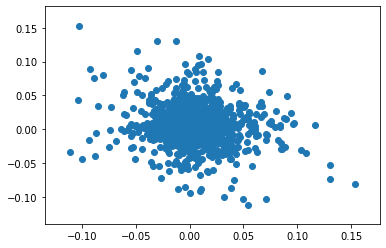

In [12]:
df1['5diasFutMenos'] = df1['Adj Close'].shift(-5)
df1['5diasFutYCambioP'] = df1['5diasFutMenos'].pct_change(5)
df1['CambioP'] = df1['Adj Close'].pct_change(5)
corr2 = df1[['CambioP','5diasFutYCambioP']].corr()
print(corr2)
plt.scatter(df1['CambioP'],df1['5diasFutYCambioP'])
plt.show()

In [20]:
cpNoNa = df1['CambioP'].dropna()
cdfycpNoNa = df1['5diasFutYCambioP'].dropna()
pearsonW = pearsonr(cpNoNa,cdfycpNoNa)
pearsonW

(-0.13130814282840264, 2.969877437770252e-06)

In [5]:
dfC = pd.read_csv('anaconda3/costco.csv')
cierre = dfC['Adj Close']
print(cierre)

0       141.747284
1       143.383606
2       143.810501
3       143.846100
4       143.321320
           ...    
1258    367.000000
1259    364.970001
1260    362.029999
1261    361.890015
1262    364.579987
Name: Adj Close, Length: 1263, dtype: float64


In [6]:
#calculamos el cambio en la columna de los cierres ajustados
cambio = cierre.diff(1)
print(cambio)

0            NaN
1       1.636322
2       0.426895
3       0.035599
4      -0.524780
          ...   
1258   -3.290009
1259   -2.029999
1260   -2.940002
1261   -0.139984
1262    2.689972
Name: Adj Close, Length: 1263, dtype: float64


In [5]:
es_ganancia, es_perdida = cambio > 0, cambio < 0
ganancia, perdida = cambio, -cambio
ganancia[es_perdida] = 0
perdida[es_ganancia] = 0

ganancia.name = 'ganancia'
perdida.name = 'perdida'
perdida.head(20)


0          NaN
1     0.000000
2     0.000000
3     0.000000
4     0.524780
5     0.000000
6     0.000000
7     1.076081
8     1.743026
9     0.000000
10    1.316193
11    3.228195
12    2.410050
13    0.000000
14    0.000000
15    3.503815
16    0.000000
17    2.481186
18    0.000000
19    1.467391
Name: perdida, dtype: float64

In [6]:
n = 14
promedio_gan = cambio * np.nan
promedio_per = cambio * np.nan
#se vectorizan con una formula recursiva

promedio_gan[n] = ganancia[:n+1].mean()
promedio_per[n] = perdida[:n+1].mean()
promedio_gan.head(16)
#con esto todos son NaN, solo se queda el número 14
#con el mean lo que hace es multiplicarse por la media
promedio_gan.name = 'promedio_gan'
promedio_per.name = 'promedio_per'


In [7]:
prom_dfC = pd.concat([ganancia, perdida, promedio_gan, promedio_per],axis=1)
print(prom_dfC)
                      

      ganancia   perdida  promedio_gan  promedio_per
0          NaN       NaN           NaN           NaN
1     1.636322  0.000000           NaN           NaN
2     0.426895  0.000000           NaN           NaN
3     0.035599  0.000000           NaN           NaN
4     0.000000  0.524780           NaN           NaN
...        ...       ...           ...           ...
1258  0.000000  3.290009           NaN           NaN
1259  0.000000  2.029999           NaN           NaN
1260  0.000000  2.940002           NaN           NaN
1261  0.000000  0.139984           NaN           NaN
1262  2.689972  0.000000           NaN           NaN

[1263 rows x 4 columns]


In [7]:
dfC = pd.read_csv('anaconda3/costco.csv')
dfC['cambio'] = dfC['Adj Close'].diff()
#utilizamos el método mask que devuelve el mismo un objeto, que es cambiado por algun otro que cumple una condición
dfC['ganancia'] = dfC.cambio.mask(dfC.cambio<0, 0.0)
dfC['perdida'] = -dfC.cambio.mask(dfC.cambio>0, -0.0)
print(dfC['perdida'])

0            NaN
1       0.000000
2       0.000000
3       0.000000
4       0.524780
          ...   
1258    3.290009
1259    2.029999
1260    2.940002
1261    0.139984
1262    0.000000
Name: perdida, Length: 1263, dtype: float64


In [8]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]


dfC['prom_gan'] = rma(dfC.ganancia[n+1:].to_numpy(), n, np.nansum(dfC.ganancia.to_numpy()[:n+1])/n)
dfC['prom_per'] = rma(dfC.perdida[n+1:].to_numpy(), n, np.nansum(dfC.perdida.to_numpy()[:n+1])/n)
dfC['rs'] = dfC.prom_gan / dfC.prom_per
dfC['rsi'] = 100 - (100 / (1 + dfC.rs))

In [9]:
dfC.head(20)

,Date,Adj Close,HPR,cambio,ganancia,perdida,prom_gan,prom_per,rs,rsi
0,2015-12-21,141.747284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-22,143.383606,0.011544,1.636322,1.636322,0.000000,NaN,NaN,NaN,NaN
2,2015-12-23,143.810501,0.002977,0.426895,0.426895,0.000000,NaN,NaN,NaN,NaN
3,2015-12-24,143.846100,0.000248,0.035599,0.035599,0.000000,NaN,NaN,NaN,NaN
4,2015-12-28,143.321320,-0.003648,-0.524780,0.000000,0.524780,NaN,NaN,NaN,NaN
5,2015-12-29,144.655273,0.009307,1.333953,1.333953,0.000000,NaN,NaN,NaN,NaN
6,2015-12-30,144.699799,0.000308,0.044526,0.044526,0.000000,NaN,NaN,NaN,NaN
7,2015-12-31,143.623718,-0.007437,-1.076081,0.000000,1.076081,NaN,NaN,NaN,NaN
8,2016-01-04,141.880692,-0.012136,-1.743026,0.000000,1.743026,NaN,NaN,NaN,NaN
9,2016-01-05,142.227509,0.002444,0.346817,0.346817,0.000000,NaN,NaN,NaN,NaN


In [7]:
#display(dfC[['Date', 'prom_gan', 'prom_per', 'rsi', 'rs']])

,Date,prom_gan,prom_per,rsi,rs
0,2015-12-21,NaN,NaN,NaN,NaN
1,2015-12-22,NaN,NaN,NaN,NaN
2,2015-12-23,NaN,NaN,NaN,NaN
3,2015-12-24,NaN,NaN,NaN,NaN
4,2015-12-28,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1258,2020-12-18,1.251009,-1.598799,-359.701662,-0.782468
1259,2020-12-21,1.161651,-1.629599,-248.243391,-0.712845
1260,2020-12-22,1.078676,-1.723199,-167.360168,-0.625973
1261,2020-12-23,1.001628,-1.610113,-164.610043,-0.622085


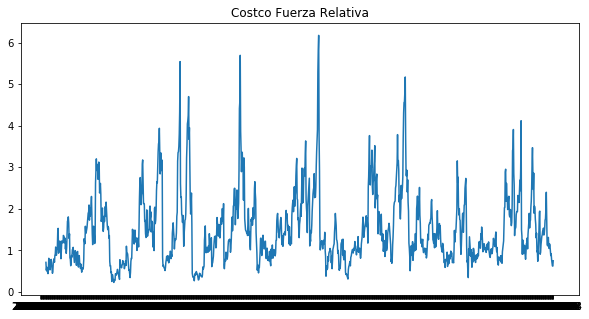

In [8]:

dfC.columns = [c.replace(' ', '_') for c in dfC.columns]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dfC.Date,dfC.rs)
ax.title.set_text('Costco Fuerza Relativa')
fig.savefig('Costco RS.png')
#ax.plot(dfC.Date,dfC.rsi)

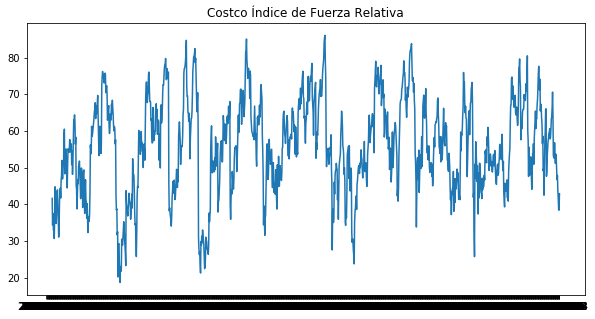

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dfC.Date,dfC.rsi)
ax.title.set_text('Costco Índice de Fuerza Relativa')
fig.savefig('CostcoRsi.png')

In [ ]:
fig, ax = plt.subplots(3,figsize=(15,5))
ax.plot(dfC.Date, dfC.Adj_Close)
ax.plot(dfC.Date,dfC.rsi)
ax.plot(dfC.Date,dfC.rs)

In [12]:
dfC['Ano'] = dfC['Date'].apply(lambda x:pd.Timestamp(x).strftime('%Y'))
dfC

,Date,Adj Close,HPR,cambio,ganancia,perdida,prom_gan,prom_per,rs,rsi,Ano
0,2015-12-21,141.747284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
1,2015-12-22,143.383606,0.011544,1.636322,1.636322,0.000000,NaN,NaN,NaN,NaN,2015
2,2015-12-23,143.810501,0.002977,0.426895,0.426895,0.000000,NaN,NaN,NaN,NaN,2015
3,2015-12-24,143.846100,0.000248,0.035599,0.035599,0.000000,NaN,NaN,NaN,NaN,2015
4,2015-12-28,143.321320,-0.003648,-0.524780,0.000000,0.524780,NaN,NaN,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...
1258,2020-12-18,367.000000,-0.008885,-3.290009,0.000000,3.290009,1.251009,1.598799,0.782468,43.897999,2020
1259,2020-12-21,364.970001,-0.005531,-2.029999,0.000000,2.029999,1.161651,1.629599,0.712845,41.617585,2020
1260,2020-12-22,362.029999,-0.008055,-2.940002,0.000000,2.940002,1.078676,1.723199,0.625973,38.498353,2020
1261,2020-12-23,361.890015,-0.000387,-0.139984,0.000000,0.139984,1.001628,1.610113,0.622085,38.350965,2020


In [13]:
anual = dfC.groupby(by=('Ano')).sum().reset_index()
anual

,Ano,Adj Close,HPR,cambio,ganancia,perdida,prom_gan,prom_per,rs,rsi
0,2015,1149.087601,0.013299,1.876434,3.477295,1.600861,0.000000,0.000000,0.000000,0.000000
1,2016,34801.519705,0.018131,0.398987,139.645609,139.246622,136.588822,136.202426,296.598825,12450.297441
2,2017,39028.338852,0.219890,32.220795,165.297210,133.076415,162.685396,130.990272,415.687211,14282.316392
3,2018,49909.859585,0.125820,18.680557,250.907440,232.226883,241.410400,212.136609,378.029546,14144.923676
4,2019,63580.593492,0.389458,89.081680,284.556050,195.474370,293.672826,211.138385,408.896254,14776.930494
5,2020,79698.297027,0.291700,80.574250,501.008914,420.434664,495.946168,412.155763,362.270476,14098.945200


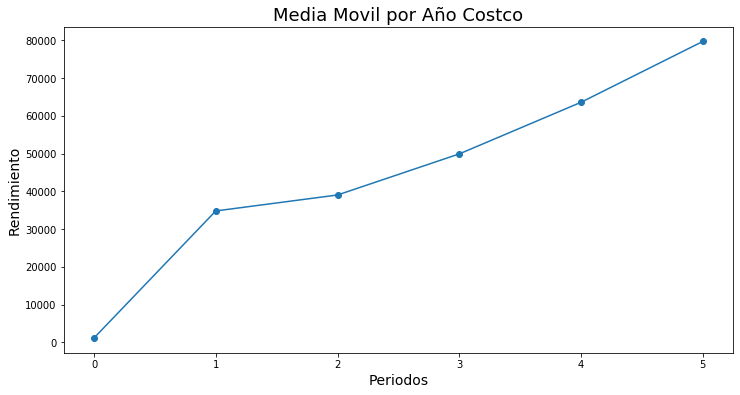

In [24]:
plt.figure(figsize=(12,6))
plt.plot(anual.index,anual['Adj Close'], '-o')
#plt.plot(dfC.index,dfC['Adj Close'])

plt.xlabel('Periodos',fontsize=14)
plt.ylabel('Rendimiento', fontsize=14)
plt.title('Media Movil por Año Costco',fontsize=18)
plt.savefig('CostcoMMPon.png')
plt.show()


In [14]:
dfC.columns = [c.replace(' ', '_') for c in dfC.columns]
dfC['MM50'] = dfC.Adj_Close.ewm(span=50).mean()
dfC['MM50']

0       141.747284
1       142.581808
2       143.007862
3       143.230159
4       143.249879
           ...    
1258    366.151447
1259    366.105115
1260    365.945307
1261    365.786276
1262    365.738970
Name: MM50, Length: 1263, dtype: float64

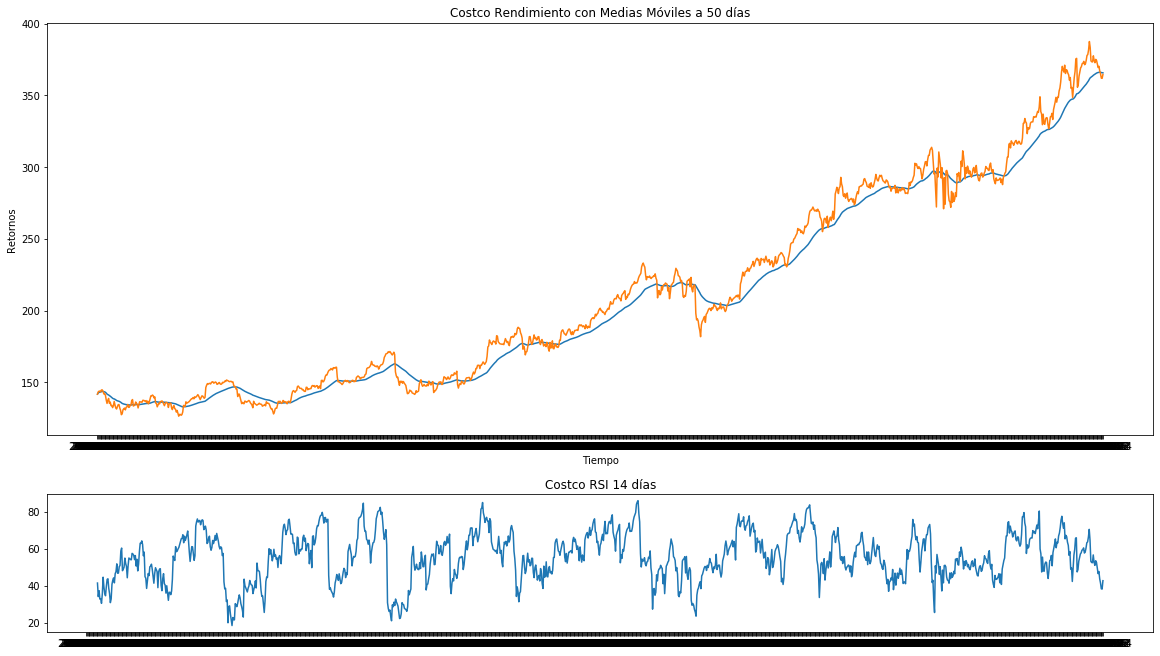

In [36]:
dfC.columns = [c.replace(' ', '_') for c in dfC.columns]
fig, ax = plt.subplots(2,1,figsize=(16,9), gridspec_kw={'height_ratios': [3, 1]},constrained_layout=True)
#fig.subplots_adjust(bottom=0.5)
#fig.tight_layout(pad=5.0)
ax[0].plot(dfC.Date,dfC.MM50)
ax[0].plot(dfC.Date,dfC.Adj_Close)
ax[0].title.set_text('Costco Rendimiento con Medias Móviles a 50 días')
ax[0].set_xlabel("Tiempo")
ax[0].set_ylabel("Retornos")

ax[1].plot(dfC.Date,dfC.rsi)
ax[1].title.set_text('Costco RSI 14 días')
plt.savefig('CostcoTotal.png')


In [3]:
dfW = pd.read_csv('anaconda3/wal.csv')
dfW['cambio'] = dfW['Adj Close'].diff()
#utilizamos el método mask que devuelve el mismo un objeto, que es cambiado por algun otro que cumple una condición
dfW['ganancia'] = dfW.cambio.mask(dfW.cambio<0, 0.0)
dfW['perdida'] = -dfW.cambio.mask(dfW.cambio>0, -0.0)
print(dfW['perdida'])

0            NaN
1       0.000000
2       0.000000
3       0.230728
4       0.071003
          ...   
1258    0.150009
1259    0.000000
1260    1.770004
1261    0.979996
1262    0.000000
Name: perdida, Length: 1263, dtype: float64


In [10]:
n = 14

dfW['prom_gan'] = rma(dfW.ganancia[n+1:].to_numpy(), n, np.nansum(dfW.ganancia.to_numpy()[:n+1])/n)
dfW['prom_per'] = rma(dfW.perdida[n+1:].to_numpy(), n, np.nansum(dfW.perdida.to_numpy()[:n+1])/n)
dfW['rs'] = dfW.prom_gan / dfW.prom_per
dfW['rsi'] = 100 - (100 / (1 + dfW.rs))

In [11]:
dfW.head(20)

,Date,Adj Close,Unnamed: 2,cambio,ganancia,perdida,prom_gan,prom_per,rs,rsi
0,2015-12-21,52.845825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-22,53.724369,0.000024,0.878544,0.878544,0.000000,NaN,NaN,NaN,NaN
2,2015-12-23,54.212456,0.000024,0.488087,0.488087,0.000000,NaN,NaN,NaN,NaN
3,2015-12-24,53.981728,0.000024,-0.230728,0.000000,0.230728,NaN,NaN,NaN,NaN
4,2015-12-28,53.910725,0.000094,-0.071003,0.000000,0.071003,NaN,NaN,NaN,NaN
5,2015-12-29,54.673908,0.000024,0.763183,0.763183,0.000000,NaN,NaN,NaN,NaN
6,2015-12-30,54.736031,0.000024,0.062123,0.062123,0.000000,NaN,NaN,NaN,NaN
7,2015-12-31,54.398808,0.000024,-0.337223,0.000000,0.337223,NaN,NaN,NaN,NaN
8,2016-01-04,54.540787,0.000094,0.141979,0.141979,0.000000,NaN,NaN,NaN,NaN
9,2016-01-05,55.836418,0.000024,1.295631,1.295631,0.000000,NaN,NaN,NaN,NaN


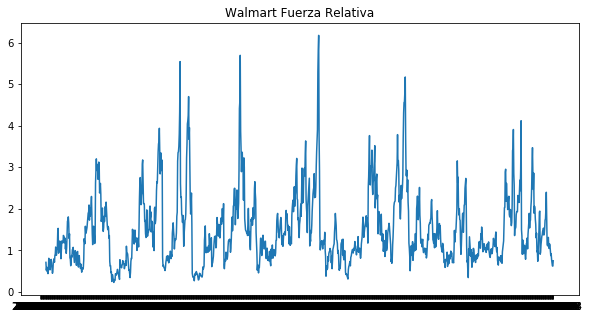

In [12]:
dfW.columns = [c.replace(' ', '_') for c in dfW.columns]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dfW.Date,dfC.rs)
ax.title.set_text('Walmart Fuerza Relativa')
fig.savefig('WalmartRS.png')
#ax.plot(dfC.Date,dfC.rsi)

In [13]:
dfW['Ano'] = dfW['Date'].apply(lambda x:pd.Timestamp(x).strftime('%Y'))
dfW

,Date,Adj_Close,Unnamed:_2,cambio,ganancia,perdida,prom_gan,prom_per,rs,rsi,Ano
0,2015-12-21,52.845825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
1,2015-12-22,53.724369,0.000024,0.878544,0.878544,0.000000,NaN,NaN,NaN,NaN,2015
2,2015-12-23,54.212456,0.000024,0.488087,0.488087,0.000000,NaN,NaN,NaN,NaN,2015
3,2015-12-24,53.981728,0.000024,-0.230728,0.000000,0.230728,NaN,NaN,NaN,NaN,2015
4,2015-12-28,53.910725,0.000094,-0.071003,0.000000,0.071003,NaN,NaN,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...
1258,2020-12-18,145.949997,0.000023,-0.150009,0.000000,0.150009,0.405512,0.493799,0.821209,45.091422,2020
1259,2020-12-21,145.970001,0.000068,0.020004,0.020004,0.000000,0.377976,0.458527,0.824325,45.185213,2020
1260,2020-12-22,144.199997,0.000023,-1.770004,0.000000,1.770004,0.350978,0.552204,0.635594,38.860114,2020
1261,2020-12-23,143.220001,0.000023,-0.979996,0.000000,0.979996,0.325908,0.582761,0.559248,35.866507,2020


In [16]:
anualW = dfW.groupby(by=('Ano')).sum().reset_index()
anualW

,Ano,Adj_Close,Unnamed:_2,cambio,ganancia,perdida,prom_gan,prom_per,rs,rsi
0,2015,432.483850,0.000236,1.552983,2.191937,0.638954,0.000000,0.000000,0.000000,0.000000
1,2016,15776.031610,0.008578,8.720783,66.930352,58.209569,66.961730,55.725482,314.750628,13409.074778
2,2017,18362.300188,0.008482,29.873733,79.609222,49.735489,77.486868,50.590123,442.815860,15016.592712
3,2018,22087.609456,0.008480,-3.191498,111.248479,114.439977,107.894585,109.375497,321.490117,13022.820229
4,2019,26615.679863,0.008363,27.086907,99.487467,72.400560,104.182526,76.300674,396.032880,14649.959634
5,2020,31951.647308,0.008158,26.611267,203.193623,176.582356,201.941201,172.980372,298.108966,13072.419810


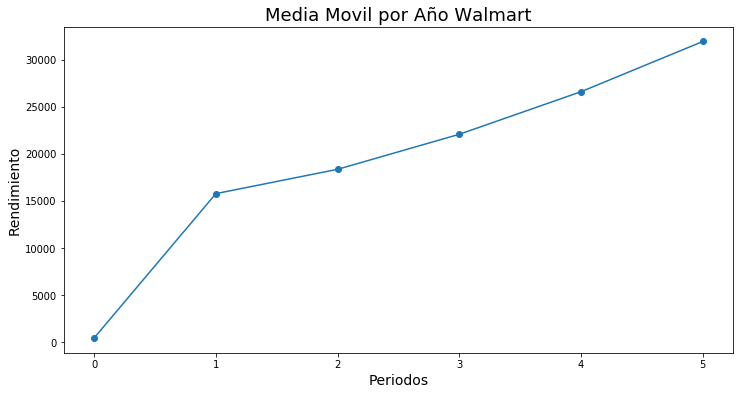

In [17]:
plt.figure(figsize=(12,6))
plt.plot(anualW.index,anual['Adj_Close'], '-o')
#plt.plot(dfC.index,dfC['Adj Close'])

plt.xlabel('Periodos',fontsize=14)
plt.ylabel('Rendimiento', fontsize=14)
plt.title('Media Movil por Año Walmart',fontsize=18)
plt.savefig('WalMMPon.png')
plt.show()

In [20]:
dfW['MM50'] = dfW.Adj_Close.ewm(span=50).mean()
dfW['MM50']

0        52.845825
1        53.293882
2        53.612401
3        53.710345
4        53.753690
           ...    
1258    145.437030
1259    145.457931
1260    145.408600
1261    145.322773
1262    145.251292
Name: MM50, Length: 1263, dtype: float64

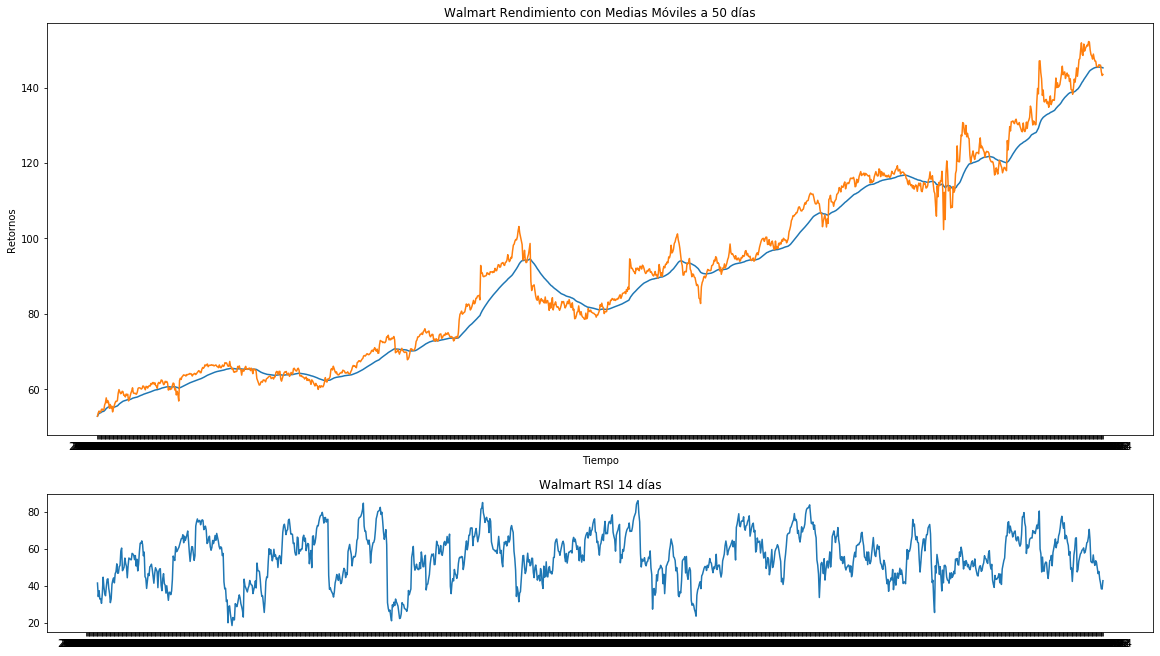

In [21]:
fig, ax = plt.subplots(2,1,figsize=(16,9), gridspec_kw={'height_ratios': [3, 1]},constrained_layout=True)
#fig.subplots_adjust(bottom=0.5)
#fig.tight_layout(pad=5.0)
ax[0].plot(dfW.Date,dfW.MM50)
ax[0].plot(dfW.Date,dfW.Adj_Close)
ax[0].title.set_text('Walmart Rendimiento con Medias Móviles a 50 días')
ax[0].set_xlabel("Tiempo")
ax[0].set_ylabel("Retornos")

ax[1].plot(dfW.Date,dfC.rsi)
ax[1].title.set_text('Walmart RSI 14 días')
plt.savefig('WalTotal.png')


In [3]:
dfT = pd.read_csv('anaconda3/tgt.csv')
dfT['cambio'] = dfT['Adj Close'].diff()
#utilizamos el método mask que devuelve el mismo un objeto, que es cambiado por algun otro que cumple una condición
dfT['ganancia'] = dfT.cambio.mask(dfT.cambio<0, 0.0)
dfT['perdida'] = -dfT.cambio.mask(dfT.cambio>0, -0.0)
print(dfT['perdida'])

0            NaN
1       0.000000
2       0.000000
3       0.409835
4       0.256157
          ...   
1258    0.820007
1259    0.000000
1260    0.000000
1261    0.000000
1262    0.000000
Name: perdida, Length: 1263, dtype: float64


In [4]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]


dfT['prom_gan'] = rma(dfT.ganancia[n+1:].to_numpy(), n, np.nansum(dfT.ganancia.to_numpy()[:n+1])/n)
dfT['prom_per'] = rma(dfT.perdida[n+1:].to_numpy(), n, np.nansum(dfT.perdida.to_numpy()[:n+1])/n)
dfT['rs'] = dfT.prom_gan / dfT.prom_per
dfT['rsi'] = 100 - (100 / (1 + dfT.rs))

In [5]:
dfT.head(20)

,Date,Adj Close,Unnamed: 2,cambio,ganancia,perdida,prom_gan,prom_per,rs,rsi
0,2015-12-21,61.229752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-22,61.998219,0.012551,0.768467,0.768467,0.000000,NaN,NaN,NaN,NaN
2,2015-12-23,62.886211,0.014323,0.887992,0.887992,0.000000,NaN,NaN,NaN,NaN
3,2015-12-24,62.476376,-0.006517,-0.409835,0.000000,0.409835,NaN,NaN,NaN,NaN
4,2015-12-28,62.220219,-0.004100,-0.256157,0.000000,0.256157,NaN,NaN,NaN,NaN
5,2015-12-29,63.560764,0.021545,1.340545,1.340545,0.000000,NaN,NaN,NaN,NaN
6,2015-12-30,62.860607,-0.011016,-0.700157,0.000000,0.700157,NaN,NaN,NaN,NaN
7,2015-12-31,61.998219,-0.013719,-0.862388,0.000000,0.862388,NaN,NaN,NaN,NaN
8,2016-01-04,62.800835,0.012946,0.802616,0.802616,0.000000,NaN,NaN,NaN,NaN
9,2016-01-05,63.902309,0.017539,1.101474,1.101474,0.000000,NaN,NaN,NaN,NaN


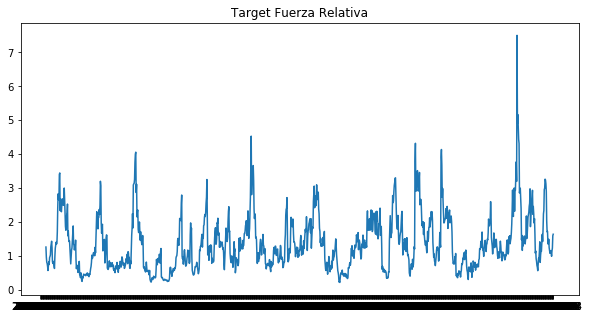

In [7]:
dfT.columns = [c.replace(' ', '_') for c in dfT.columns]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dfT.Date,dfT.rs)
ax.title.set_text('Target Fuerza Relativa')
fig.savefig('Target RS.png')